In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
static_data_filename = "recorded_sensor_data/imu_drift_test/being_static_for_6_mins.csv"
reader = csv.reader(open(static_data_filename, 'r'))

next(reader) # skip header
static_data = []
for row in reader:
    static_data.append([float(x) for x in row])
static_data = np.array(static_data)

In [4]:
dynamic_data_filename = "recorded_sensor_data/imu_drift_test/dynamic_test_01.csv"
reader = csv.reader(open(dynamic_data_filename, 'r'))

next(reader) # skip header
dynamic_data = []
for row in reader:
    dynamic_data.append([float(x) for x in row])
dynamic_data = np.array(dynamic_data)

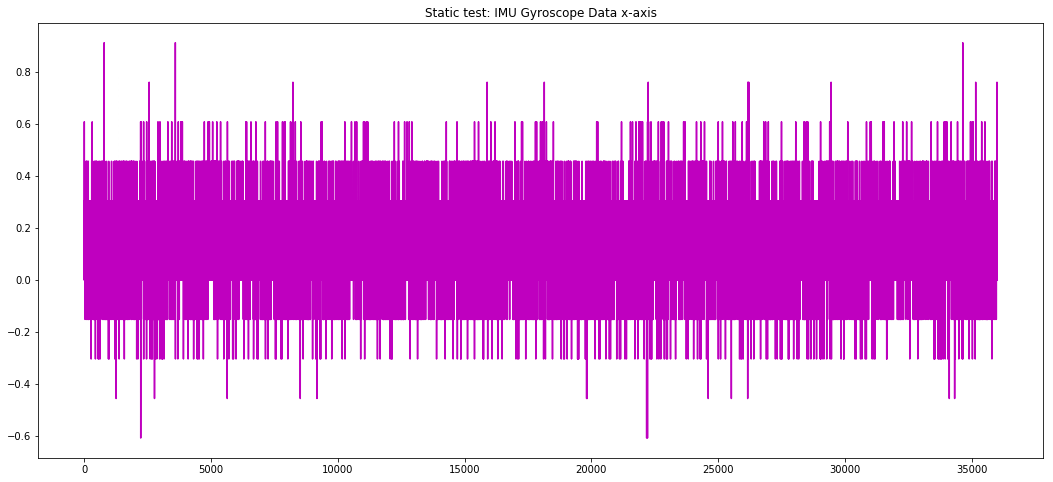

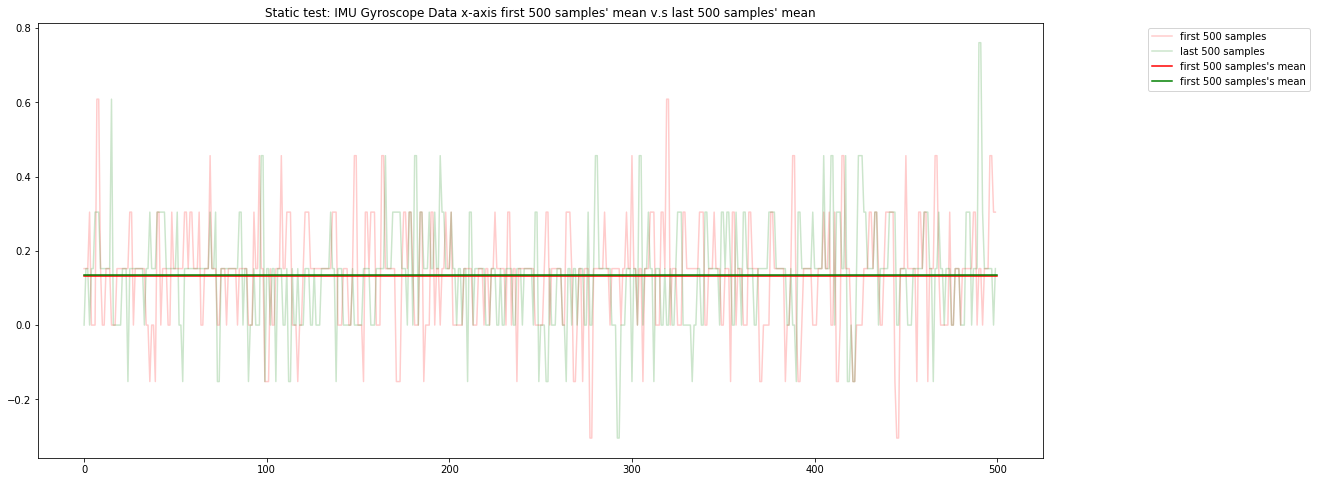

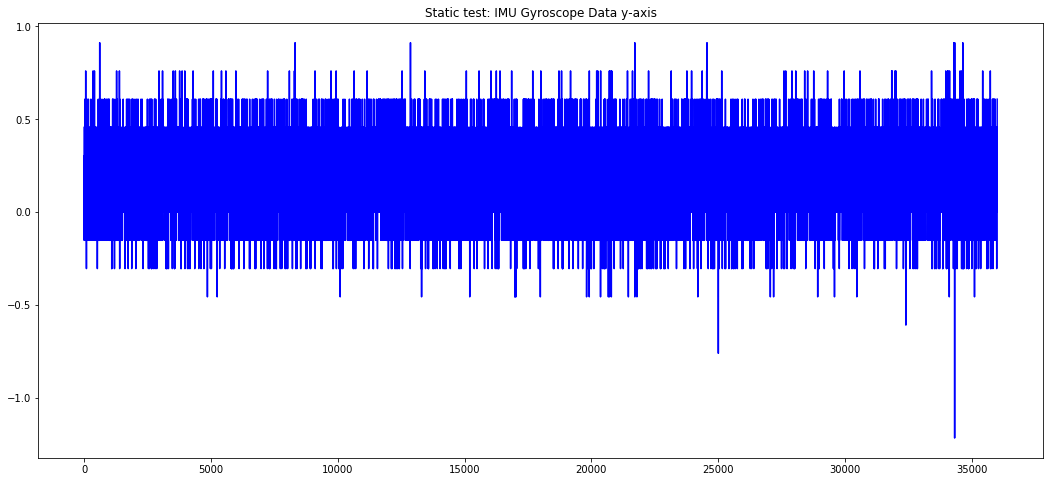

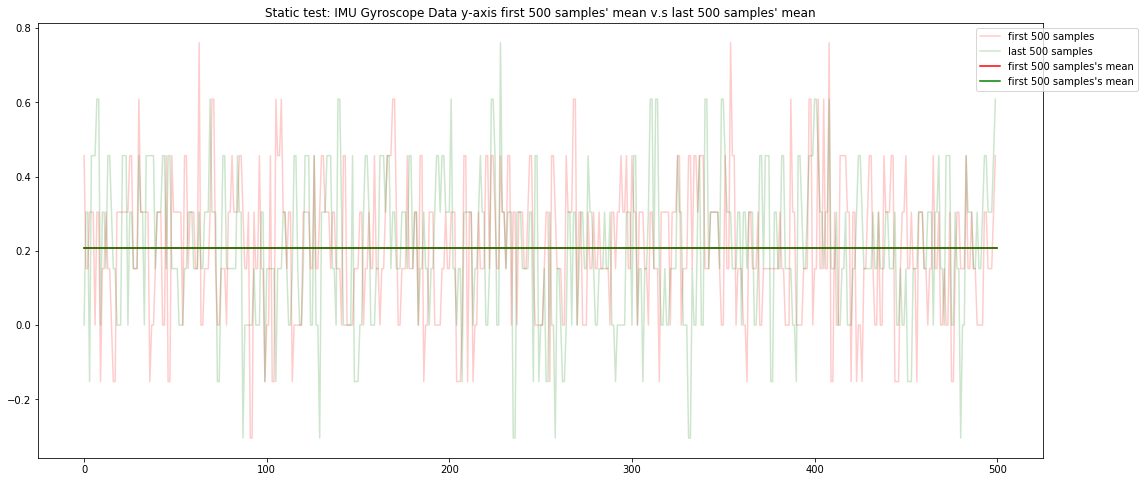

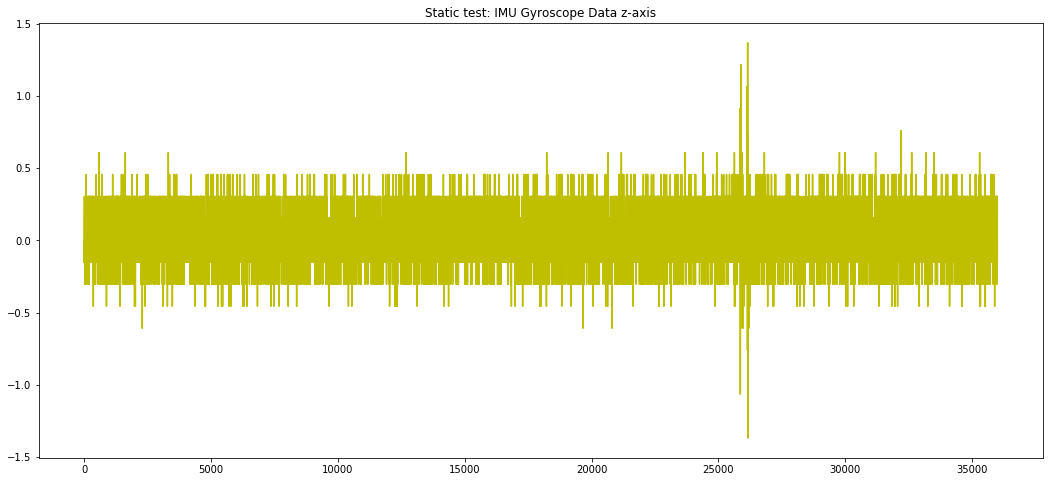

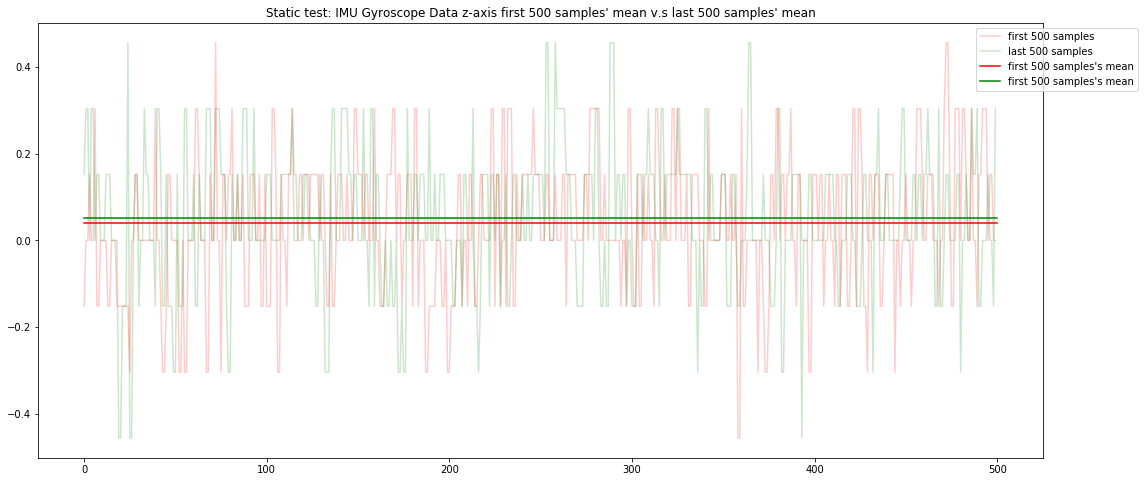

In [5]:
opacity = 0.2

plt.figure(figsize=(18,8))
plt.title("Static test: IMU Gyroscope Data x-axis")
plt.plot(static_data[:,3] ,c='m')
plt.show()


plt.figure(figsize=(18,8))
plt.title("Static test: IMU Gyroscope Data x-axis first 500 samples' mean v.s last 500 samples' mean")
first = static_data[:500,3]
last = static_data[35500:,3]
first_mean = np.mean(first, axis = 0)
last_mean = np.mean(last, axis = 0)
plt.plot(first, label = 'first 500 samples', c='r', alpha = opacity)
plt.plot(last, label = 'last 500 samples', c='g', alpha = opacity)
plt.plot([0, 500], [first_mean, first_mean], c = 'r', label = "first 500 samples's mean")
plt.plot([0, 500], [last_mean, last_mean], c = 'g', label = "first 500 samples's mean")
plt.legend(bbox_to_anchor=(1.1,1))
plt.show()


plt.figure(figsize=(18,8))
plt.title("Static test: IMU Gyroscope Data y-axis")
plt.plot(static_data[:,4], label='gyro y', c='b')
plt.show()


plt.figure(figsize=(18,8))
plt.title("Static test: IMU Gyroscope Data y-axis first 500 samples' mean v.s last 500 samples' mean")
first = static_data[:500,4]
last = static_data[35500:,4]
first_mean = np.mean(first, axis = 0)
last_mean = np.mean(last, axis = 0)
plt.plot(first, label = 'first 500 samples', c='r', alpha = opacity)
plt.plot(last, label = 'last 500 samples', c='g', alpha = opacity)
plt.plot([0, 500], [first_mean, first_mean], c = 'r', label = "first 500 samples's mean")
plt.plot([0, 500], [last_mean, last_mean], c = 'g', label = "first 500 samples's mean")
plt.legend(bbox_to_anchor=(1.1,1))
plt.show()

plt.figure(figsize=(18,8))
plt.title("Static test: IMU Gyroscope Data z-axis")
plt.plot(static_data[:,5], label='gyro z', c='y')
plt.show()

plt.figure(figsize=(18,8))
plt.title("Static test: IMU Gyroscope Data z-axis first 500 samples' mean v.s last 500 samples' mean")
first = static_data[:500,5]
last = static_data[35500:,5]
first_mean = np.mean(first, axis = 0)
last_mean = np.mean(last, axis = 0)
plt.plot(first, label = 'first 500 samples', c='r', alpha = opacity)
plt.plot(last, label = 'last 500 samples', c='g', alpha = opacity)
plt.plot([0, 500], [first_mean, first_mean], c = 'r', label = "first 500 samples's mean")
plt.plot([0, 500], [last_mean, last_mean], c = 'g', label = "first 500 samples's mean")
plt.legend(bbox_to_anchor=(1.1,1))
plt.show()


In [6]:
def get_x_y_pts(data, intervals):
    results = []
    for i in intervals:
        y_pt = np.mean(data[i[0]: i[1]], axis = 0)
        results.append([[i[0],i[1]],[y_pt,y_pt]])
    return results

In [7]:
intervals = [[0, 5500],[7500, 11500],[14000, 17500],[20000, 24000],[27500, 35000]]

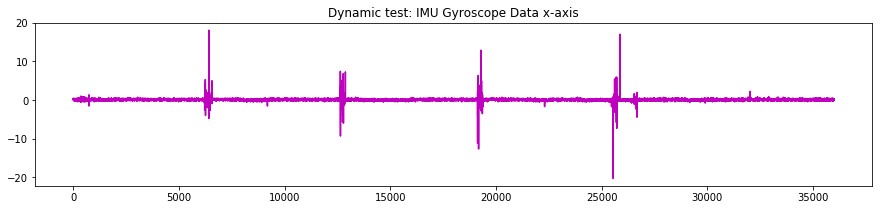

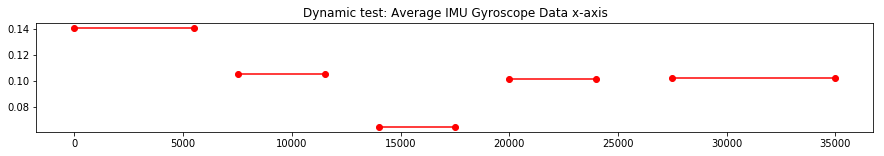

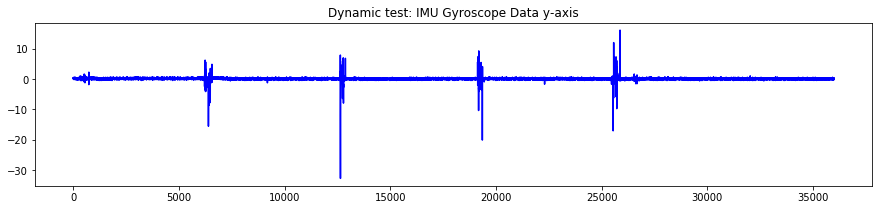

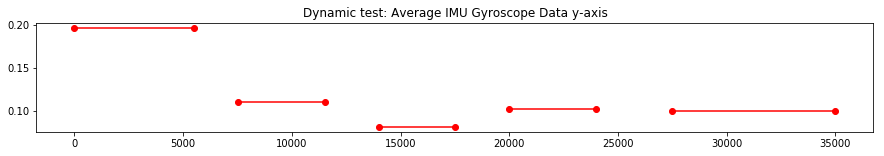

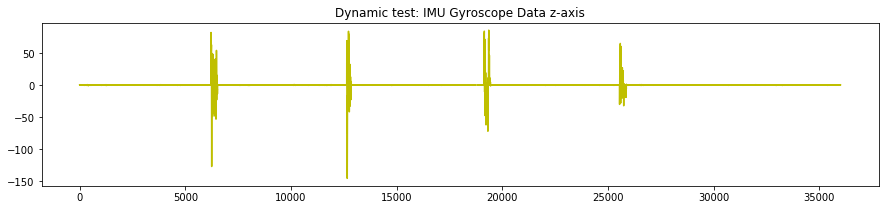

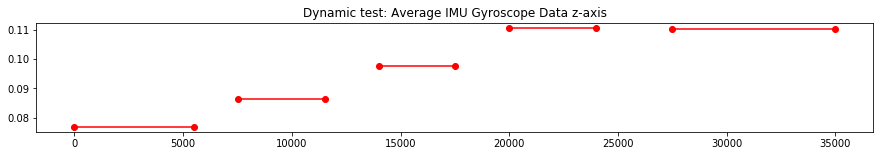

In [8]:
plt.figure(figsize=(15,3))
plt.title("Dynamic test: IMU Gyroscope Data x-axis")
plt.plot(dynamic_data[:,3] ,c='m')
plt.show()

plt.figure(figsize=(15,2))
plt.title("Dynamic test: Average IMU Gyroscope Data x-axis")
pts = get_x_y_pts(dynamic_data[:,3],intervals)
for p in pts: 
    plt.plot(p[0], p[1], c = 'r', marker = 'o')
plt.show()

plt.figure(figsize=(15,3))
plt.title("Dynamic test: IMU Gyroscope Data y-axis")
plt.plot(dynamic_data[:,4], label='gyro y', c='b')
plt.show()


plt.figure(figsize=(15,2))
plt.title("Dynamic test: Average IMU Gyroscope Data y-axis")
pts = get_x_y_pts(dynamic_data[:,4],intervals)
for p in pts: 
    plt.plot(p[0], p[1], c = 'r', marker = 'o')
plt.show()

plt.figure(figsize=(15,3))
plt.title("Dynamic test: IMU Gyroscope Data z-axis")
plt.plot(dynamic_data[:,5], label='gyro z', c='y')
plt.show()

plt.figure(figsize=(15,2))
plt.title("Dynamic test: Average IMU Gyroscope Data z-axis")
pts = get_x_y_pts(dynamic_data[:,5],intervals)
for p in pts: 
    plt.plot(p[0], p[1], c = 'r', marker = 'o')
plt.show()


In [9]:
def integrate_sth(data, time_unit, convertion_factor):
    result = [0]
    last_val = 0
    for index, data_point in enumerate(data[1:]):
        mean = data[index] / 2 + data[index + 1] / 2
        new_val = mean * time_unit * convertion_factor + last_val
        result.append(new_val)
        last_val = new_val
    return result

def integrate_sth2(data, time_unit, convertion_factor):
    result = [0]
    last_val = 0
    for index, data_point in enumerate(data[1:]):
        new_val = data_point * time_unit * convertion_factor + last_val
        result.append(new_val)
        last_val = new_val
    return result

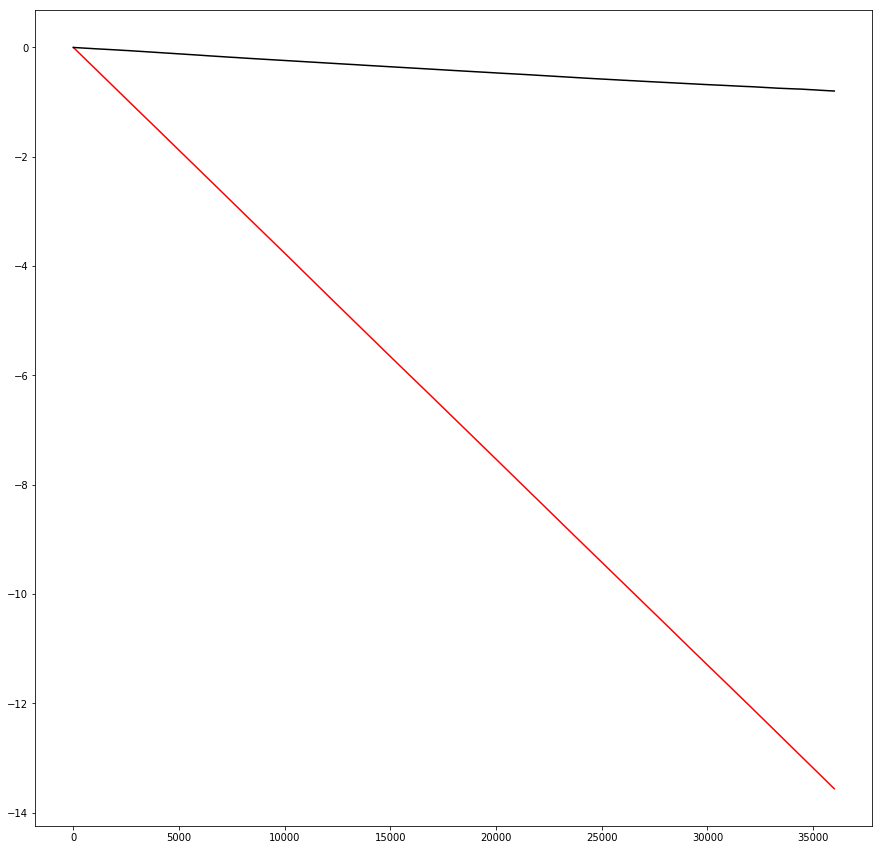

In [10]:
x_velocity = integrate_sth(static_data[:,0], 0.01, 1)
y_velocity = integrate_sth(static_data[:,1], 0.01, 1)
# z_velocity = integrate_sth(dynamic_data[:,2], 0.01, 9.8)

plt.figure(figsize=(15,15))
plt.title("")
plt.plot(x_velocity, c = 'r')
plt.plot(y_velocity, c = 'k')
# plt.plot(z_velocity, c = 'g')
plt.show()